In [1]:
#import the standard packages for data science
import pandas as pd
import xtarfile as tarfile
import missingno as msno
import folium
import matplotlib.pyplot as plt

In [2]:
stations = pd.read_csv('stations.csv')
temps = pd.read_csv('Temps.csv')

In [3]:
datex = "20180101 00:00"

temps["date"] = pd.to_datetime(temps['date'], format='%Y%m%d %H:%M')

In [48]:
temps.dropna(axis=1).shape

(87600, 4)

In [4]:
def get_hour(x):
    return x.floor('H')

hourlyMean = temps.groupby(temps['date'].apply(get_hour)).apply(lambda x: x.mean() - 273.15)


C:\Users\Asus\AppData\Local\Temp\ipykernel_3472\1467157273.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  hourlyMean = temps.groupby(temps['date'].apply(get_hour)).apply(lambda x: x.mean() - 273.15)


In [7]:
hourlyMean.shape

(8760, 533)

In [8]:
goodhours = hourlyMean[hourlyMean.columns[hourlyMean.isnull().mean() < 0.001]]

In [9]:
goodhours.shape

(8760, 246)

In [37]:
m = folium.Map(location=[45.188529, 5.724524], zoom_start=12)
for i in goodhours.columns:
    folium.Marker([stations.set_index("number_sta").loc[int(i), 'lat'], stations.set_index("number_sta").loc[int(i), 'lon']]).add_to(m)
    
m

In [60]:
goodhours.fillna(method='ffill', inplace=True)
goodhours.columns = [int(i) for i in goodhours.columns]

C:\Users\Asus\AppData\Local\Temp\ipykernel_12296\156039044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodhours.fillna(method='ffill', inplace=True)


In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(goodhours.T)

print(kmeans.labels_)

[1 1 0 1 0 0 1 1 2 0 1 0]


In [47]:
len(kmeans.labels_)

12

In [50]:
m = folium.Map(location=[45.188529, 5.724524], zoom_start=12)
for i in range(len(kmeans.labels_)):
    folium.Marker([stations.set_index("number_sta").loc[int(goodhours.columns[i]), 'lat'],
                   stations.set_index("number_sta").loc[int(goodhours.columns[i]), 'lon']],
                  popup=kmeans.labels_[i],
                  icon=folium.Icon(color='red' if kmeans.labels_[i] == 0 else 'blue' if kmeans.labels_[i] == 1 else 'green')
                  ).add_to(m)
m

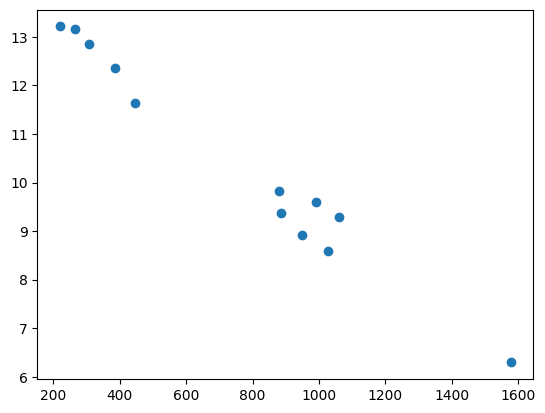

In [67]:
goodstations = stations[stations["number_sta"].isin(goodhours.columns)]

plt.scatter(goodstations["height_sta"], goodhours.mean(axis=0))

In [56]:
len(kmeans.labels_)

12

In [59]:
goodhours.columns

Index(['26074001', '26168001', '26307001', '38269004', '38362001', '38384001',
       '38395004', '38442008', '38504002', '38538002', '38548001', '73171002'],
      dtype='object')